## Дослідження відвідуваності статей у Вікіпедії українською

Хоча українська мова є рідною для більшості наслення України ([60%](http://texty.org.ua/pg/article/Oximets/read/72173/Stan_ukrajinskoji_movy_Shhorichnyj_monitoryng_Rosijska_dominuje)), за кількістю переглядів мовних розділів Вікіпедії з території України лідирує російський.

![wiki in Ukraine](https://upload.wikimedia.org/wikipedia/commons/6/6f/Squid_uk_vs_ru_wiki_in_ukraine.png?uselang=uk "Відвідування статей Вікіпедії з території України")

Очевидною причиною цього є те, що російська Вікіпедія має приблизно вдвічі більше статей ([1 355 4141](https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0) проти [663 004](https://uk.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B5%D1%86%D1%96%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0:%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0) україньских), зазвичай, ліпшої якості.

Але, ймовірно, на розподіл відвідуваності впливають також інші фактори. Наприклад, робота пошукових систем, якість окремих статей чи повнота висвітлення цілої теми, мета пошуку: навчальна, розважальна тощо. Я планую спробувати дослідити деякі із цих чинників.

## Українська і російська вікіпедії у пошуковиках

Користувачі зазвичай приходять до Вікіпедії через пошуковики ([дані](http://ewulczyn.github.io/Wikipedia_Clickstream_Getting_Started/), які це доводять, доступні, на жаль, тільки для Вікіпедії англійською).

Деякі українські вікіпедисти стверджують, що значне відставання за кількістю відвідувань Вікіпедії українською від російської пояснюється в першу чергу роботою пошукових систем, які пріоритезують російські статі. Також неодноразово згадувалось, що на результати пошуку впливає налаштування мови браузера і/або облікового запису користувача у відповідній пошуковій системі.

Основне питання цієї частини дослідження: наскільки ймовірний сценарій за якого:
1. Користувач(ка) хоче прочитати інформацію уркаїнською.
2. Українська стаття на цікаву їй/йому тему існує в укрвікі.
3. Пошукова система показує їй/йому посилання на російську статтю вище, ніж українську в результатах пошуку (через неналаштовану/неправильно налаштовану мову облікового запису або браузера або з інших причин).

Я вирішила перевірити, як результати пошуку залежать від таких факторів:
* мова запиту (або той факт, що запит не відрізняються українською і російською мовами)
* (не) додавання у кінці запиту слова 'вікіпедія' або 'википедия'
* пошукова система - google (з tld '.com.ua' або '.ru') або yandex (ці дві вибрані, оскільки вони [найпоширеніші](http://www.alexa.com/topsites/countries/UA) в Україні)
* мова налаштування облікового запису або анонімний пошук
* мова налаштування браузера (точніше значення HTTP заголовка 'Accept-Language')

### Що вже зробила

Для кількох популярних запитів із цих сторінок: [укр](https://tools.wmflabs.org/topviews/?project=uk.wikipedia.org&platform=all-access&date=last-month&excludes=), [рос](https://tools.wmflabs.org/topviews/?project=ru.wikipedia.org&platform=all-access&date=last-month&excludes=) перевірила порядок, у якому знаходяться українські і російські статті Вікіпедії при різних комбінаціях наведених вище факторів.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

%matplotlib inline

In [127]:
search_engine_results = pd.read_csv('/home/zlira/wiki_pageviews/search_engines/search_engine_index.csv')
search_engine_results.head()

,account_lang,browser_lang,cite,query_lang,ru_index,uk_index,wiki,name,first_lang
0,uk,uk,google.com.ua,None,3,1,uk,Тоторо,uk
1,uk,uk,google.com.ua,None,2,1,ru,Тоторо,uk
2,uk,uk,google.com.ua,None,2,1,None,Тоторо,uk
3,uk,uk,google.ru,None,1,-1,uk,Тоторо,ru
4,uk,uk,google.ru,None,1,-1,ru,Тоторо,ru


In [147]:
def plot_factor(df, col_name, ax, title):
    df_ = df[[col_name]].copy()
    df_['uk_first'] = df.first_lang == 'uk'
    df_['ru_first'] = df.first_lang == 'ru'
    stats_df = df_.groupby(col_name).sum()
    stats_df = stats_df.div(stats_df.sum(axis=1), axis=0)
    stats_df.plot.barh(stacked=True, legend=False, width=1, ax=ax, title=title,
                       color=['#E9257E', '#1991CA'], edgecolor='white', linewidth=1)
    ax.set_ylabel('')
    ax.set_axis_bgcolor('white')

In [133]:
def plot_all_cols(df):
    num_rows = 2
    num_cols = 3
    fig, axes = plt.subplots(figsize=(10, 6), squeeze=False)
    for i, col in enumerate(c for c in df.columns if c not in {'uk_index', 'ru_index', 'name', 'first_lang'}):
        ax = plt.subplot2grid((num_rows, num_cols), (int(i/num_cols), (i % num_cols)))
        plot_factor(df, col, ax, col)
        handlers, labels = ax.get_legend_handles_labels()
    plt.figlegend(handlers, labels, loc = 'lower right')
    fig.suptitle('Частка пошуків, у яких прешим результатом була стаття української або російської Вікіпедії',
                 fontsize='x-large')
    plt.tight_layout()
    fig.subplots_adjust(top=0.85)

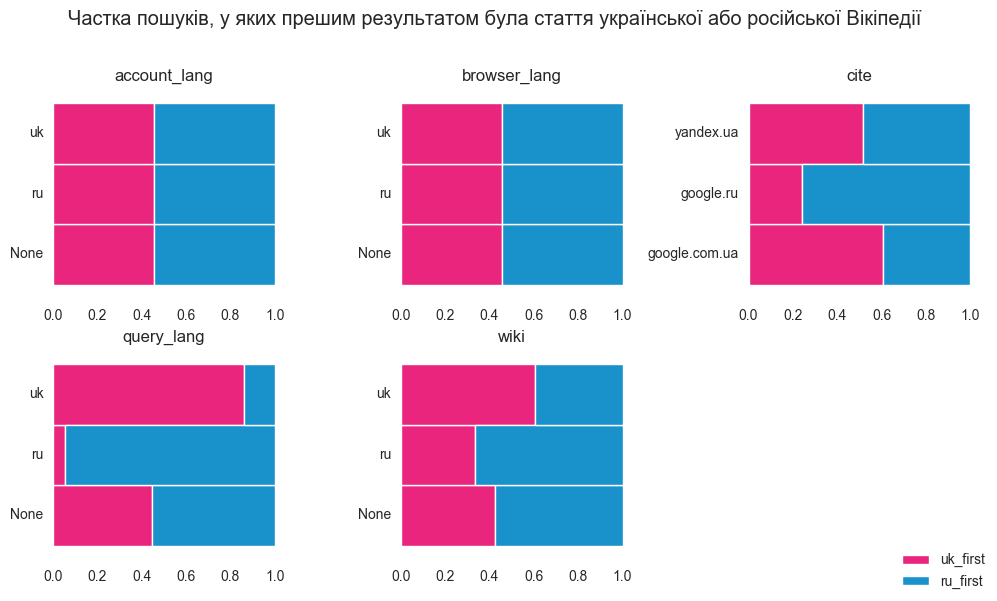

In [148]:
plot_all_cols(search_engine_results)

Примітка: None має різне значення для різних змінних, а саме account_lang - анонімний запит, browser_lang - брак заголовка 'Accept-Language', query_lang - запит однаковий українською і російською, wiki - до запиту не додавалось слово Вікіпедія жодною мовою.

Як видно із графіка, для досліджених запитів мова налаштування браузера і облікового запису не має значення.

Також можна перевірити за яких умов при українському запиті користувач(ка) отримує посилання на рувікі на першому місці і побачити, що (у цій обмеженій вибірці) це буває тільки тоді, коли запит зроблений через google.ru. <sub><sup>Не знаю, чого б хтось таке робив, оскільки гугл автоматично перенаправляє на google.com.ua</sup></sub>

In [149]:
search_engine_results[
    (search_engine_results['query_lang'] == 'uk') &
    (search_engine_results['wiki'] != 'ru') &
    (search_engine_results['first_lang'] == 'ru')
]

,account_lang,browser_lang,cite,query_lang,ru_index,uk_index,wiki,name,first_lang
489,uk,uk,google.ru,uk,1,2,uk,Дім дивних дітей,ru
507,uk,ru,google.ru,uk,1,2,uk,Дім дивних дітей,ru
525,uk,None,google.ru,uk,1,2,uk,Дім дивних дітей,ru
543,ru,uk,google.ru,uk,1,2,uk,Дім дивних дітей,ru
561,ru,ru,google.ru,uk,1,2,uk,Дім дивних дітей,ru
579,ru,None,google.ru,uk,1,2,uk,Дім дивних дітей,ru
597,None,uk,google.ru,uk,1,2,uk,Дім дивних дітей,ru
615,None,ru,google.ru,uk,1,2,uk,Дім дивних дітей,ru
633,None,None,google.ru,uk,1,2,uk,Дім дивних дітей,ru
653,uk,uk,google.ru,uk,1,3,None,Мітохондрія,ru


На основі цих даних можна побудувати дерево рішень, що показуватиме вплив досліджуваних чинників на те, яка вікіпедійна стаття знайдеться першою - українська чи російська.

In [150]:
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

pandas2ri.activate()

In [151]:
rpart = importr('rpart')
fit = rpart.rpart(
    'first_lang ~ .', 
    data=search_engine_results.drop(['uk_index', 'ru_index', 'name'], axis=1), 
    method='class'
)

In [152]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


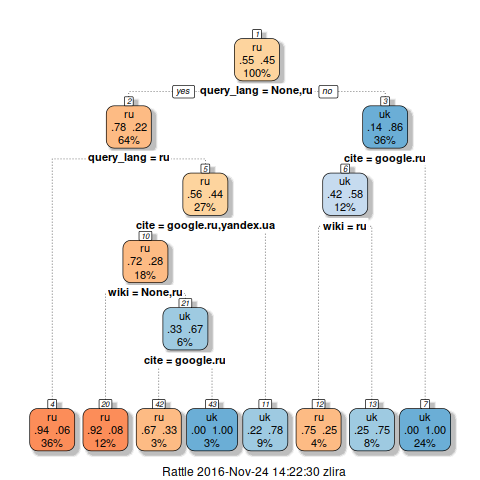

In [153]:
%%R -i fit
library(rpart.plot)
library(rattle)
fancyRpartPlot(fit, palettes='OrRd')

### Які обмеження

За умовами використання Google скрейпінг заборонений, що робить такі експерименти не етичними і, що важливіше, занчно важчими, через те, що після певної кількості підозрілих запитів він просить ввести капчу. Тому назбирати велику вибірку досить складно.

### Що ще планую зробити

1. Назбирати більше даних.
2. Наразі досить чітко видно, що найбільше значення має мова запиту, але оскільки люди, мабуть, рідко вводять весь запит самостійно, слід перевірити, чи налаштування браузера/облікового запису впливають на появу українських чи російських назв у випадайці з автодоповненнями при пошуку.

## Вплив якості української статті і російського відповідника на її відвідуваніть

Хоч користувач(ка), шукаючи інформацію, наперед не знає про якість статті, можна вигадати кліька сценаріїв, за яких підвищення якості статті призведе до збільшення її відвідуваності. Наприклад, повважавши сторінку інформативною, він/вона може наділсати кому-небудь посилання, зайти ще раз до/перечитати, нагадати собі якісь факти, чи використати зображення.

Так само можна уявити, що, зайшовши на російську статтю і не задовольнивши свої потреби, двомовна людина може перейти на українську інтервікі, подивитись, що там.

Щоб перевірити, чи може покращення якості української статті призвести до росту її відвідування, а покарщення російської інтревікі - до спаду, думаю, найліпше дивитись на кожну окрему статтю впродовж часу її існування. Таким чином можна, принаймні частково, усунути фактор популярності теми статті.

### Що вже зробила

Я маю можливість отримувати дані про відвідуваність українських статей, починаючи з 2008 року, а також про розмір української і російської статті за весь час їхнього існування через API. Частина даних завантажена локально в InfluxDB (відвідування для ~30 000 статей). 

Нижче наведені два графіки для статті 'Клітина': на першому її відвідуваність з часом, на другому - 1) (червоною лінією) таж відвідуваність, але згладжена, 2) зміна розміру української статті з часом 3) зміна розміру російської статті. Видно, що ріст статті відбуається одночасно із ростом відвідуваності, в той час, як падіння відвідуваності збігається в часі із збільшенням російської статті.

In [61]:
from wiki_api.client import WikiApiClient

uk_client = WikiApiClient()
ru_client = WikiApiClient('ru')

In [62]:
def page_size_by_month(df):
    return df.resample('M').mean().fillna(method='ffill')

In [63]:
def get_uk_and_ru_revisions(uk_title, plot=True):
    # get data from API
    uk_df = uk_client.get_page_revision_ts(uk_title)
    ru_title = uk_client.get_interwiki(uk_title, 'ru')
    ru_df = ru_client.get_page_revision_ts(ru_title)
    
    # resample
    uk_df = page_size_by_month(uk_df)
    ru_df = page_size_by_month(ru_df)
    
    joined = pd.DataFrame.join(uk_df, ru_df, lsuffix='_uk', rsuffix='_ru')
    joined['ratio'] = joined['size_uk'] / joined['size_ru']
    if plot:
        joined.plot(figsize=(11.5, 4), title='Revision sizes ({})'.format(uk_title))
    return joined

In [65]:
from pageviews_parse.article_views import get_views_for_period
from datetime import date

def get_uk_pageviews(title, start=date(2008, 3, 1), end=date(2016, 10, 31)):
    views_dict = get_views_for_period(title, start, end)
    dates, values = zip(*views_dict.items())
    df = pd.DataFrame({'value': values}, index=dates)
    df = df.resample('M').mean()
    df.plot(figsize=(11.5, 4), title='Page views in ukwiki ({})'.format(title))
    return df

In [67]:
def plot_2_axes(series_1, series_2, series_3, title, 
                y_label_1, y_label_2):
    fig, ax1 = plt.subplots(figsize=(11.5, 4))
    plt.title(title)

    ax2 = ax1.twinx()
    ax1.plot(series_1, 'b-', label='uk')
    ax1.plot(series_2, 'g-', label='ru')
    ax1.legend(loc='best')
    ax2.plot(series_3, 'r-')

    ax1.set_xlabel('Date')
    ax1.set_ylabel(y_label_1, color='b')
    ax2.set_ylabel(y_label_2, color='r')

In [79]:
from influx.client import InfluxClient

influx_cl = InfluxClient(db='wiki_sampled')
uk_wiki_df = influx_cl.get_pageviews_df('_uk_wiki').resample('M').mean()

In [80]:
def inspect_article_views(title):
    revs = get_uk_and_ru_revisions(title, plot=False)
    views = get_uk_pageviews(title).tz_localize('UTC')
    diff_norm_views = (views.value / uk_wiki_df[:'2016-07'].value * 100000).rolling(
        window=12).mean().to_frame()
    plot_2_axes(
            revs['2009':]['size_uk'], revs['2009':]['size_ru'], diff_norm_views.value, 
            title, 'Article size', 'UK pageviews normalized rolling mean'
    )

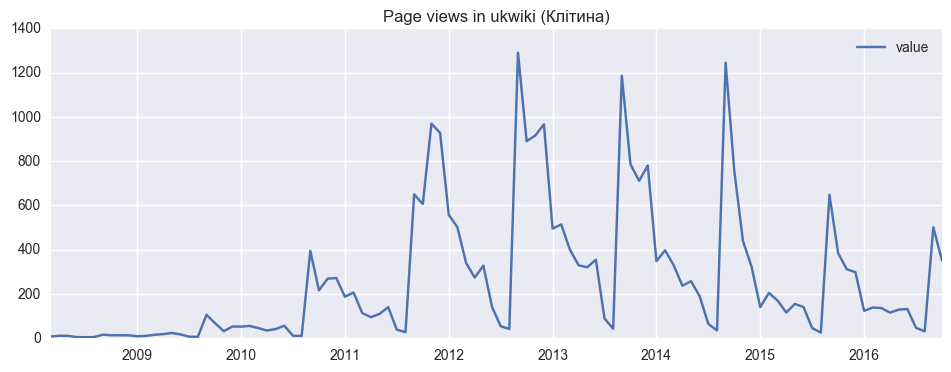

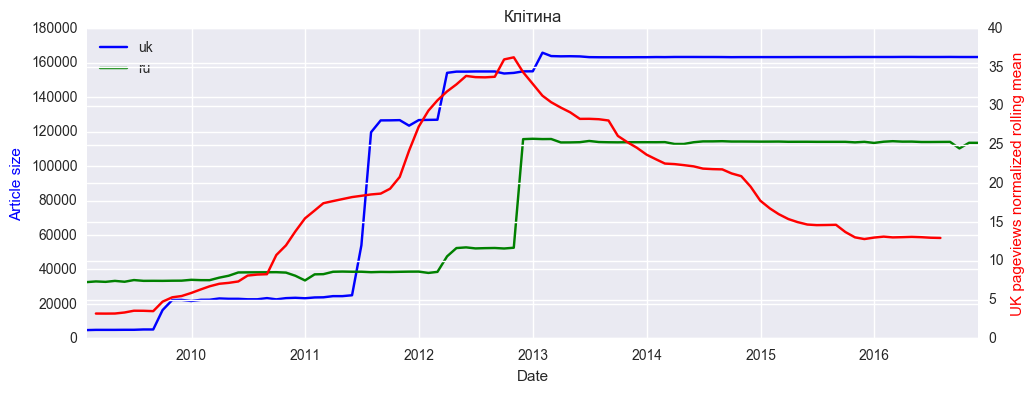

In [81]:
inspect_article_views('Клітина')

Для інших статей ця закономірність може бути значно слабшою, або її може зовсім не бути. Нижче ще кілька прикладів.

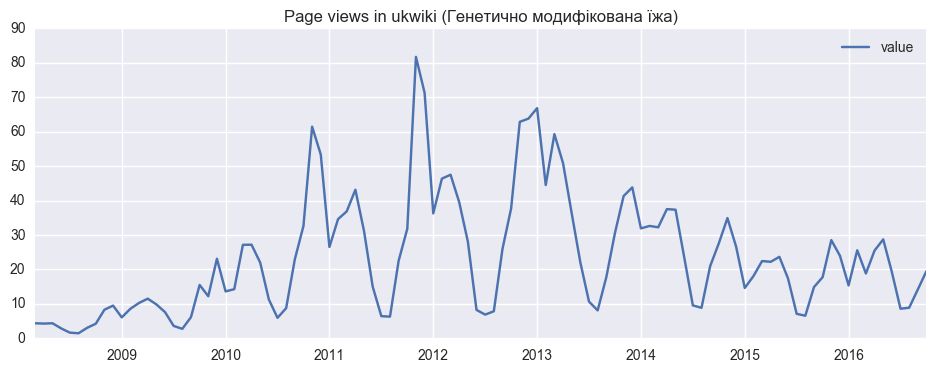

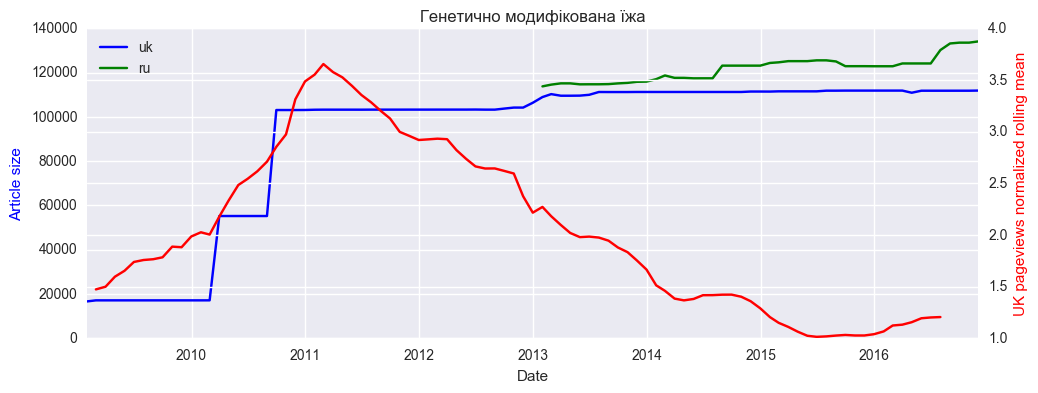

In [82]:
inspect_article_views('Генетично модифікована їжа')

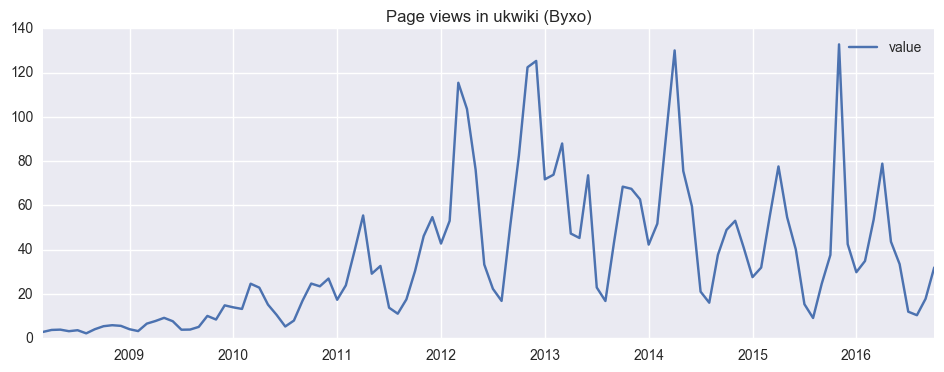

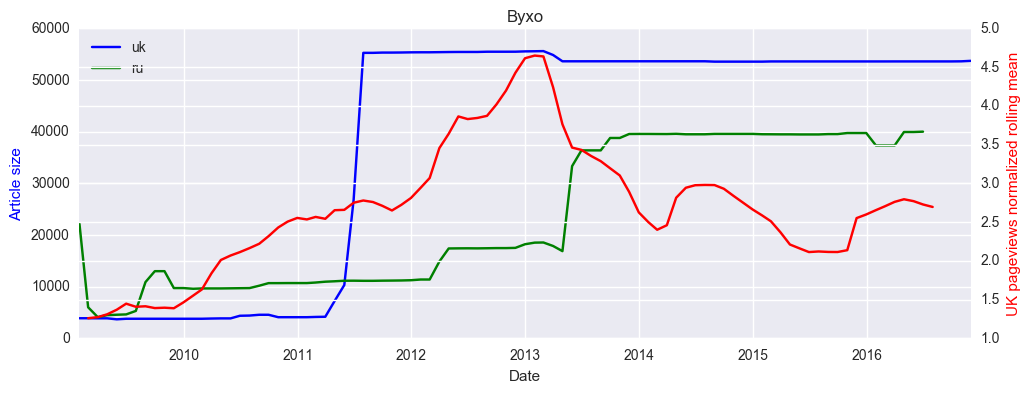

In [84]:
inspect_article_views('Вухо')

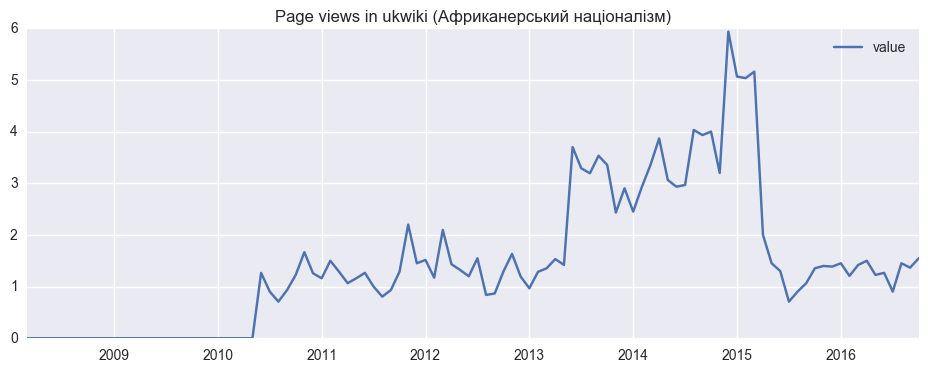

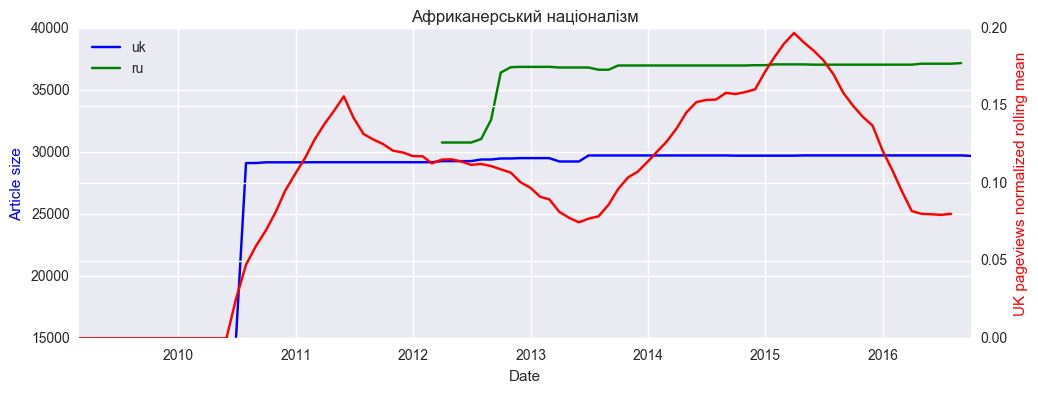

In [85]:
inspect_article_views('Африканерський націоналізм')

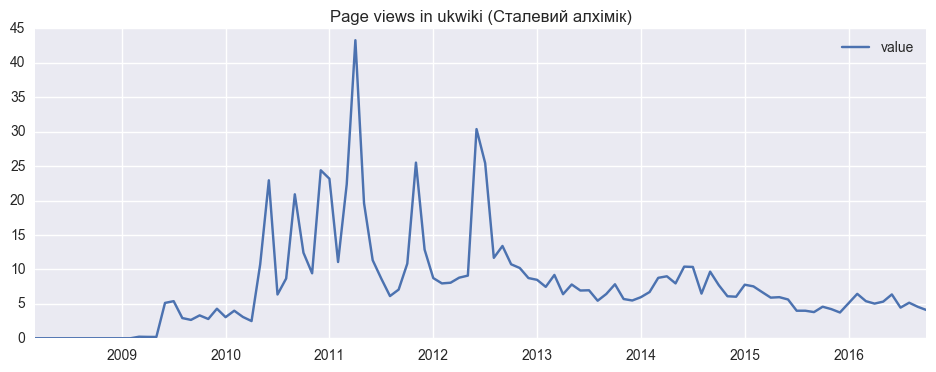

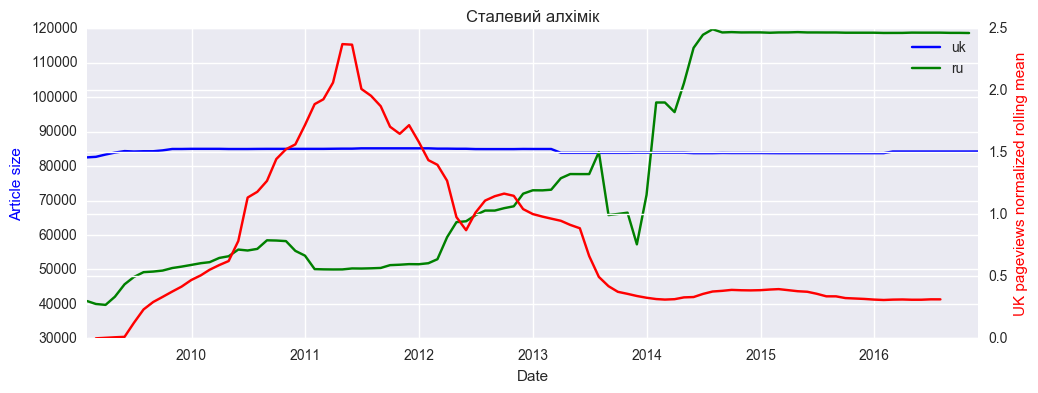

In [86]:
inspect_article_views('Сталевий алхімік')

Не знаю, чи знадобиться мені це для цього дослідження, але я також навчилась робити просту, і, мабуть, некоректну, сезонну ARIMA модель часового ряду на прикладі статті 'Клітина'. Вона навіть робить якісь передбачення.

In [90]:
cell = influx_cl.get_pageviews_df('Клітина')
cell = cell.resample('M').mean()
norm = ((cell.value / uk_wiki_df.value) * 1000000)
norm_log = norm.apply(np.log).to_frame()

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
sarima = SARIMAX(norm_log.value, order=(1, 0, 1), seasonal_order=(1, 0, 0, 12),
                 enforce_stationarity=False).fit()

In [95]:
print(sarima.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  106
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 12)   Log Likelihood                 -39.623
Date:                            Wed, 23 Nov 2016   AIC                             87.246
Time:                                    17:34:41   BIC                             97.900
Sample:                                01-31-2008   HQIC                            91.564
                                     - 10-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8380      0.096      8.715      0.000       0.649       1.026
ma.L1         -0.1112      0.183   

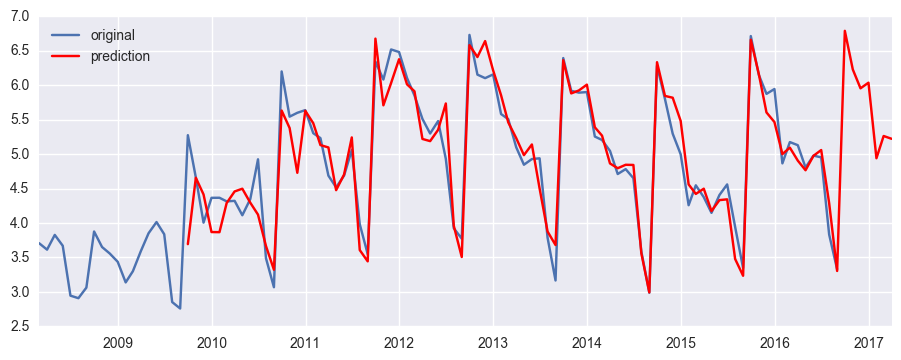

In [97]:
plt.figure(figsize=(11, 4))
plt.plot(norm_log, label='original')
plt.plot(sarima.predict(start=20, end=110), label='prediction', c='r')
plt.legend(loc='best')

###  Які обмеження

По-перше, є багато нюансів із вікіпедійними даними щодо відвідуваності (збоої їхньої системи логування запитів, розподіл відвідуваності між основною статею і сторінками-перенаправленнями, зміна принципу логування у 2015 році тощо), по-друге, розмір статті є тільки дуже приблизним показником якості. Також я спершу намагалась завантажити всі необхідні дані для *всіх* статей української Вікіпедії, але це не вдається з ряду причин, тому доведеться працювати з вибіркою.

### Що планую зробити

1. Очевидно, придумати придумати найкращий спосіб перевірити вплив зміни розміру української і російської статей на відвідування першої. Тут мені **найбільше потрібна порада**. Я бачила, що для часових рядів, є такі методи як lagged regression і intervention analysis, але ще не знаю наскільки мені це підійде і як звести результати для різних статей в одне. Хоча, можливо, вдасться зробити простішим чином, збувшись сезонності, і порівнявши значення відвідуваності до і після події.

## Сезонні закономірності відвідуваності

Сумарна картина перегляду усіх статей в українській Вікіпедії має значно більш виражений сезонний характер, пов'язаний з навчальним роком, ніж російська. Цікаво було б подивитись, яка частина статей має таку виражену сезонність, чи сезонність частіше трапляється серед відносно популярних статей, чи ні, інші цікаві закономірності.

Кілька прикладів:

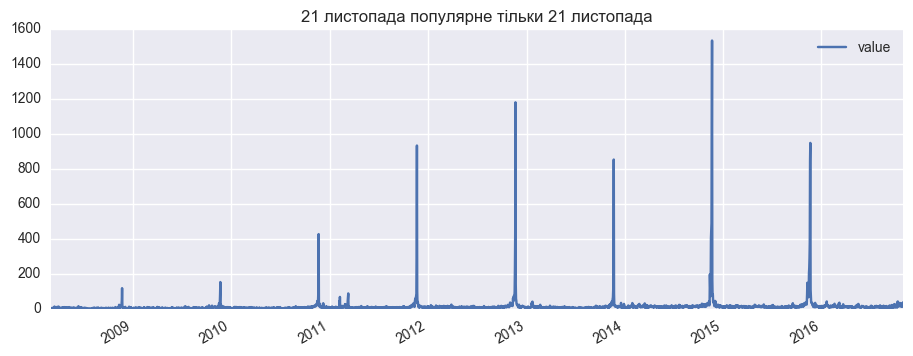

In [102]:
influx_cl = InfluxClient(db='wiki_sampled_2')

influx_cl.get_pageviews_df('21 листопада').plot(title='21 листопада популярне тільки 21 листопада', figsize=(11, 4))

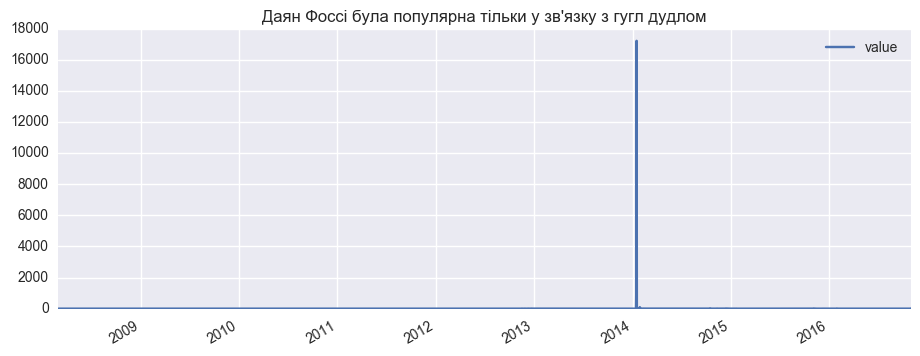

In [154]:
influx_cl.get_pageviews_df('Даян Фоссі').plot(title='Даян Фоссі була популярна тільки у зв\'язку з гугл дудлом', 
                                              figsize=(11, 4))

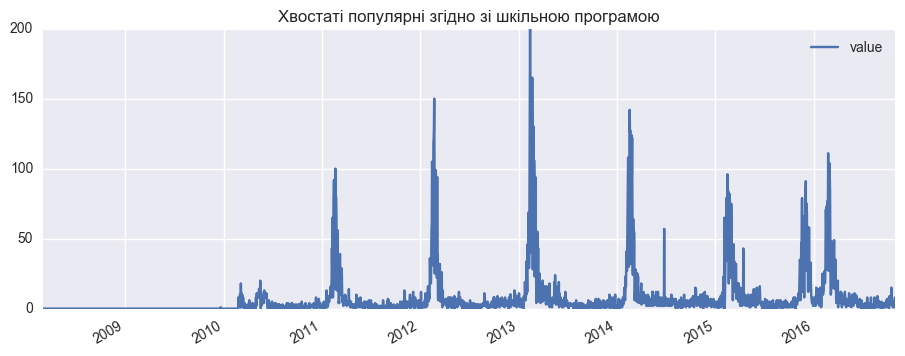

In [104]:
influx_cl.get_pageviews_df('Хвостаті').plot(title='Хвостаті популярні згідно зі шкільною програмою', figsize=(11, 4))

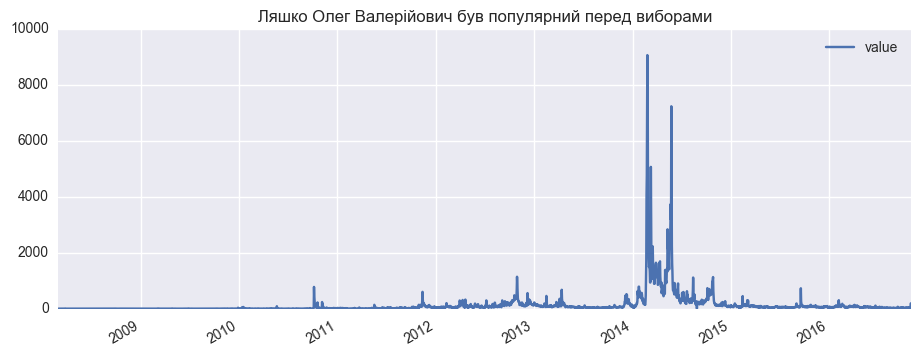

In [155]:
influx_cl.get_pageviews_df('Ляшко Олег Валерійович').plot(title='Ляшко Олег Валерійович був популярний перед виборами', 
                                                          figsize=(11, 4))

Можна було би спробувати зробити кластеризацію статей на основі таких закономірностей, але мені наразі не вдаєтсья придумати правильний набір фіч для цього.

Також, було би цікаво подивитись на розподіл популярних статей української і російської Вікіпедій за темами. Наприклад, у серед найпопулярніших за [жовтень 2016](https://tools.wmflabs.org/topviews/?project=ru.wikipedia.org&platform=all-access&date=last-month&excludes=) у російській Вікіпедії багато фільмів і серіалів, а в [українській](https://tools.wmflabs.org/topviews/?project=uk.wikipedia.org&platform=all-access&date=last-month&excludes=) їх немає, натомість більше навчальних тем.

Для того, щоб визначити широку тему статті можна використовувати дерево категорій Вікіпедії. Наразі це працює не ідеально, але ось кілька прикладів:

In [1]:
from categories.classify_article_by_topic import get_article_categories

get_article_categories('Клітина')

('Біологія',)

In [2]:
get_article_categories('Ляшко Олег Валерійович')

('Соціологія', 'Політика')

In [4]:
get_article_categories('Дім дивних дітей')

('Література',)